# Casual Conversations V2 EDA

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import json

## Importing the Dataset

In [4]:
df = pd.read_json('CasualConversationsV2.json')
df.head()

,video_name,subject_id,age,gender,native_language,secondary_languages,disabilities,physical_adornments,physical_attributes,voice_timbre,...,monk_skin_tone,geo_location,video_setup,video_quality,background_noise,spoken_language,capture_environment,hemisphere,weather,video_duration_secs
0,0000_portuguese_nonscripted_1.mp4,0,22,cis man,portuguese,"[english (united states), spanish (latin ameri...","{'vision': False, 'hearing': False, 'physical_...","{'have_hair_cover': False, 'hair_color': None,...","{'hair_type': 'wavy', 'hair_color': 'brunette'...","{'type': 'average pitch', 'confidence': 'high'}",...,"{'scale': 'scale 5', 'confidence': 'medium'}","{'country': 'brazil', 'state_region': 'acre'}","{'type': 'nonscripted', 'speech_topic': 'tell ...",high,False,portuguese,indoor,southern_hemisphere,sunny,59.780844
1,0000_portuguese_nonscripted_2.mp4,0,22,cis man,portuguese,"[english (united states), spanish (latin ameri...","{'vision': False, 'hearing': False, 'physical_...","{'have_hair_cover': False, 'hair_color': None,...","{'hair_type': 'wavy', 'hair_color': 'brunette'...","{'type': 'average pitch', 'confidence': 'high'}",...,"{'scale': 'scale 5', 'confidence': 'medium'}","{'country': 'brazil', 'state_region': 'acre'}","{'type': 'nonscripted', 'speech_topic': 'tell ...",high,False,portuguese,indoor,southern_hemisphere,sunny,76.686878
2,0000_portuguese_nonscripted_3.mp4,0,22,cis man,portuguese,"[english (united states), spanish (latin ameri...","{'vision': False, 'hearing': False, 'physical_...","{'have_hair_cover': False, 'hair_color': None,...","{'hair_type': 'wavy', 'hair_color': 'brunette'...","{'type': 'average pitch', 'confidence': 'high'}",...,"{'scale': 'scale 5', 'confidence': 'medium'}","{'country': 'brazil', 'state_region': 'acre'}","{'type': 'nonscripted', 'speech_topic': 'tell ...",high,False,portuguese,indoor,southern_hemisphere,sunny,70.291300
3,0000_portuguese_nonscripted_4.mp4,0,22,cis man,portuguese,"[english (united states), spanish (latin ameri...","{'vision': False, 'hearing': False, 'physical_...","{'have_hair_cover': False, 'hair_color': None,...","{'hair_type': 'wavy', 'hair_color': 'brunette'...","{'type': 'average pitch', 'confidence': 'high'}",...,"{'scale': 'scale 5', 'confidence': 'medium'}","{'country': 'brazil', 'state_region': 'acre'}","{'type': 'nonscripted', 'speech_topic': 'tell ...",high,False,portuguese,outdoor,southern_hemisphere,sunny,63.536578
4,0000_portuguese_nonscripted_5.mp4,0,22,cis man,portuguese,"[english (united states), spanish (latin ameri...","{'vision': False, 'hearing': False, 'physical_...","{'have_hair_cover': False, 'hair_color': None,...","{'hair_type': 'wavy', 'hair_color': 'brunette'...","{'type': 'low pitch', 'confidence': 'high'}",...,"{'scale': 'scale 5', 'confidence': 'medium'}","{'country': 'brazil', 'state_region': 'acre'}","{'type': 'nonscripted', 'speech_topic': 'tell ...",high,False,portuguese,indoor,southern_hemisphere,sunny,64.312378


## Understanding the data
### Drop columns that aren't needed
### Change null values in gender to 'prefer not to say'
### Change 'prefer not to say' values in age to 0
Values not dropped because clips are not being dropped, therefore the stats still apply

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26467 entries, 0 to 26466
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   video_name             26467 non-null  object 
 1   subject_id             26467 non-null  int64  
 2   age                    26467 non-null  object 
 3   gender                 26443 non-null  object 
 4   native_language        26467 non-null  object 
 5   secondary_languages    26467 non-null  object 
 6   disabilities           26467 non-null  object 
 7   physical_adornments    26467 non-null  object 
 8   physical_attributes    26467 non-null  object 
 9   voice_timbre           26467 non-null  object 
 10  fitzpatrick_skin_tone  26467 non-null  object 
 11  monk_skin_tone         26467 non-null  object 
 12  geo_location           26467 non-null  object 
 13  video_setup            26467 non-null  object 
 14  video_quality          26467 non-null  object 
 15  ba

In [6]:
df = df.drop(columns = ['secondary_languages','disabilities','physical_adornments','physical_attributes','voice_timbre','video_setup','video_quality','background_noise','spoken_language','capture_environment','hemisphere','weather','video_duration_secs'])

In [7]:
# replace age 'prefer not to say' with 0
df['age'].replace(to_replace = 'prefer not to say', value = 0, inplace = True)

In [8]:
#change null gender values to 'prefer not to say'
df['gender'].fillna('prefer not to say', inplace = True)

In [10]:
df[df['gender'].isnull()]

,video_name,subject_id,age,gender,native_language,fitzpatrick_skin_tone,monk_skin_tone,geo_location


In [11]:
#change data types
df[['video_name', 'gender']] = df[['video_name', 'gender']].astype('string')
df['age'] = df['age'].astype(int)
df.dtypes

video_name               string
subject_id                int64
age                       int32
gender                   string
native_language          object
fitzpatrick_skin_tone    object
monk_skin_tone           object
geo_location             object
dtype: object

In [12]:
df

,video_name,subject_id,age,gender,native_language,fitzpatrick_skin_tone,monk_skin_tone,geo_location
0,0000_portuguese_nonscripted_1.mp4,0,22,cis man,portuguese,"{'type': 'type iii', 'confidence': 'medium'}","{'scale': 'scale 5', 'confidence': 'medium'}","{'country': 'brazil', 'state_region': 'acre'}"
1,0000_portuguese_nonscripted_2.mp4,0,22,cis man,portuguese,"{'type': 'type iii', 'confidence': 'medium'}","{'scale': 'scale 5', 'confidence': 'medium'}","{'country': 'brazil', 'state_region': 'acre'}"
2,0000_portuguese_nonscripted_3.mp4,0,22,cis man,portuguese,"{'type': 'type iii', 'confidence': 'medium'}","{'scale': 'scale 5', 'confidence': 'medium'}","{'country': 'brazil', 'state_region': 'acre'}"
3,0000_portuguese_nonscripted_4.mp4,0,22,cis man,portuguese,"{'type': 'type iii', 'confidence': 'medium'}","{'scale': 'scale 5', 'confidence': 'medium'}","{'country': 'brazil', 'state_region': 'acre'}"
4,0000_portuguese_nonscripted_5.mp4,0,22,cis man,portuguese,"{'type': 'type iii', 'confidence': 'medium'}","{'scale': 'scale 5', 'confidence': 'medium'}","{'country': 'brazil', 'state_region': 'acre'}"
...,...,...,...,...,...,...,...,...
26462,5565_vietnamese_scripted_3.mp4,5565,37,cis man,vietnamese,"{'type': 'type iii', 'confidence': 'low'}","{'scale': 'scale 5', 'confidence': 'low'}","{'country': 'vietnam', 'state_region': 'thai b..."
26463,5566_vietnamese_nonscripted_0.mp4,5566,30,cis man,vietnamese,"{'type': 'type iii', 'confidence': 'low'}","{'scale': 'scale 5', 'confidence': 'low'}","{'country': 'vietnam', 'state_region': 'thai n..."
26464,5566_vietnamese_nonscripted_1.mp4,5566,30,cis man,vietnamese,"{'type': 'type iii', 'confidence': 'low'}","{'scale': 'scale 5', 'confidence': 'low'}","{'country': 'vietnam', 'state_region': 'thai n..."
26465,5566_vietnamese_scripted_2.mp4,5566,30,cis man,vietnamese,"{'type': 'type iii', 'confidence': 'low'}","{'scale': 'scale 5', 'confidence': 'low'}","{'country': 'vietnam', 'state_region': 'thai n..."


## Stats for Gender

In [13]:
#group gender categories to count
gender = df.groupby(by='gender').count()['subject_id']
gender

gender
cis man              10999
cis woman            14573
non-binary             260
prefer not to say      530
transgender man         75
transgender woman       30
Name: subject_id, dtype: int64

In [14]:
#un_gend to find unique gender categories
un_gend = sorted(df['gender'].unique())

#count_gend to save the count as an array
count_gend = np.array(gender)

#perc_gend to find the percentages of each category
total_g = df['gender'].count()
perc_gend = []

for i in un_gend:
   perc_gend.append(round((gender[i]/total_g*100),2))

#create a data frame with the gender, count and percentage
data_gend = {'Gender': un_gend, 'Count':count_gend, 'Percentage':perc_gend}

df_gend = pd.DataFrame(data_gend)
df_gend


,Gender,Count,Percentage
0,cis man,10999,41.56
1,cis woman,14573,55.06
2,non-binary,260,0.98
3,prefer not to say,530,2.00
4,transgender man,75,0.28
5,transgender woman,30,0.11


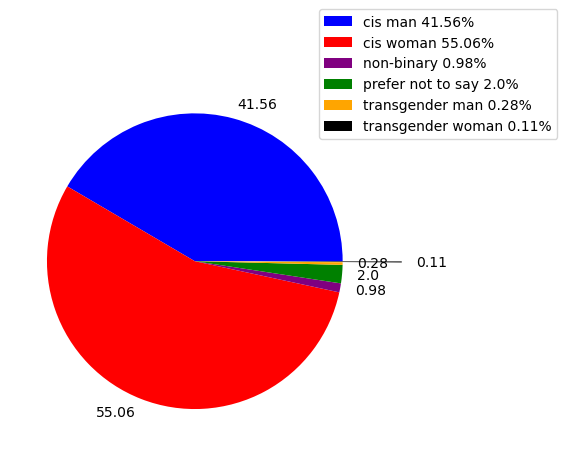

In [15]:
explode = [0,0,0,0,0,0.4]
colors = ['blue','red','purple','green','orange', 'black']
plt.pie(df_gend['Count'],labels= df_gend['Percentage'], explode=explode, colors = colors )
labels = df_gend['Gender'] +' '+ df_gend['Percentage'].astype(str) + '%'
plt.legend(labels, loc='best', bbox_to_anchor=(0.5, 0.5, 1, 0.7))

## Stats for Age

In [16]:
# Function that can classify a value into a date bucket
def my_func(x):
    if x >= 65 and x < 110:
        return '65 and older'
    elif x >= 55 and x < 65:
        return '55-64'
    elif x >= 45 and x < 55:
        return '45-54'
    elif x >= 35 and x < 45:
        return '35-44'
    elif x >= 25 and x < 35:
        return '25-34'
    elif x >= 18 and x < 25:
        return '18-24'
    #elif x < 18:
     #   return 'Below 18'
    else:
        return 'Age bucket unknown'

In [17]:
df['Age Bucket'] = df['age'].apply(my_func)

In [18]:
df

,video_name,subject_id,age,gender,native_language,fitzpatrick_skin_tone,monk_skin_tone,geo_location,Age Bucket
0,0000_portuguese_nonscripted_1.mp4,0,22,cis man,portuguese,"{'type': 'type iii', 'confidence': 'medium'}","{'scale': 'scale 5', 'confidence': 'medium'}","{'country': 'brazil', 'state_region': 'acre'}",18-24
1,0000_portuguese_nonscripted_2.mp4,0,22,cis man,portuguese,"{'type': 'type iii', 'confidence': 'medium'}","{'scale': 'scale 5', 'confidence': 'medium'}","{'country': 'brazil', 'state_region': 'acre'}",18-24
2,0000_portuguese_nonscripted_3.mp4,0,22,cis man,portuguese,"{'type': 'type iii', 'confidence': 'medium'}","{'scale': 'scale 5', 'confidence': 'medium'}","{'country': 'brazil', 'state_region': 'acre'}",18-24
3,0000_portuguese_nonscripted_4.mp4,0,22,cis man,portuguese,"{'type': 'type iii', 'confidence': 'medium'}","{'scale': 'scale 5', 'confidence': 'medium'}","{'country': 'brazil', 'state_region': 'acre'}",18-24
4,0000_portuguese_nonscripted_5.mp4,0,22,cis man,portuguese,"{'type': 'type iii', 'confidence': 'medium'}","{'scale': 'scale 5', 'confidence': 'medium'}","{'country': 'brazil', 'state_region': 'acre'}",18-24
...,...,...,...,...,...,...,...,...,...
26462,5565_vietnamese_scripted_3.mp4,5565,37,cis man,vietnamese,"{'type': 'type iii', 'confidence': 'low'}","{'scale': 'scale 5', 'confidence': 'low'}","{'country': 'vietnam', 'state_region': 'thai b...",35-44
26463,5566_vietnamese_nonscripted_0.mp4,5566,30,cis man,vietnamese,"{'type': 'type iii', 'confidence': 'low'}","{'scale': 'scale 5', 'confidence': 'low'}","{'country': 'vietnam', 'state_region': 'thai n...",25-34
26464,5566_vietnamese_nonscripted_1.mp4,5566,30,cis man,vietnamese,"{'type': 'type iii', 'confidence': 'low'}","{'scale': 'scale 5', 'confidence': 'low'}","{'country': 'vietnam', 'state_region': 'thai n...",25-34
26465,5566_vietnamese_scripted_2.mp4,5566,30,cis man,vietnamese,"{'type': 'type iii', 'confidence': 'low'}","{'scale': 'scale 5', 'confidence': 'low'}","{'country': 'vietnam', 'state_region': 'thai n...",25-34


In [19]:
#group Age Bucket categories to count
age_buckets = df.groupby(by='Age Bucket').count()['subject_id']
age_buckets

Age Bucket
18-24                  6955
25-34                 12423
35-44                  4803
45-54                  1687
55-64                   404
65 and older             85
Age bucket unknown      110
Name: subject_id, dtype: int64

In [20]:
#un_age_bucket to find unique age bucket categories
un_age_bucket = sorted(df['Age Bucket'].unique())

#count_age_bucket to save the count as an array
count_age_bucket= np.array(age_buckets)

#perc_age_bucket to find the percentages of each category
total_e = df['Age Bucket'].count()
perc_age_bucket = []

for i in un_age_bucket:
    perc_age_bucket.append(round((age_buckets[i]/total_e*100),2))

#create a data frame with the ethinicity, count and percentage
data_age_bucket = {'Age Bucket': un_age_bucket, 'Count':count_age_bucket, 'Percentage':perc_age_bucket}

df_age_bucket = pd.DataFrame(data_age_bucket)
df_age_bucket

,Age Bucket,Count,Percentage
0,18-24,6955,26.28
1,25-34,12423,46.94
2,35-44,4803,18.15
3,45-54,1687,6.37
4,55-64,404,1.53
5,65 and older,85,0.32
6,Age bucket unknown,110,0.42


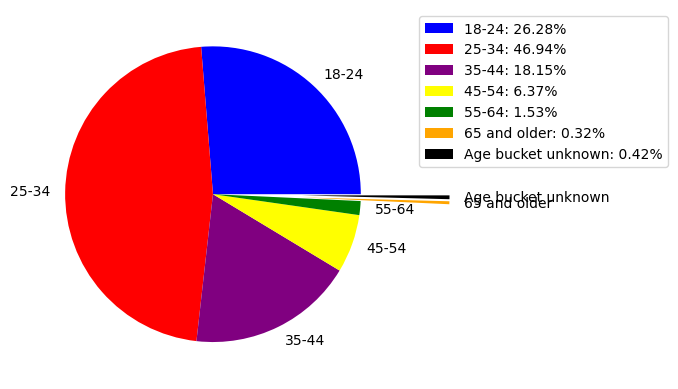

In [21]:
#Pie chart plot of the information
explode1 = [0,0,0,0,0,0.6,0.6]
colors1 = ['blue','red','purple','yellow' ,'green','orange', 'black']
plt.pie(df_age_bucket['Count'], labels = df_age_bucket['Age Bucket'], explode = explode1, colors = colors1)
labels1 = df_age_bucket['Age Bucket'] +': '+ df_age_bucket['Percentage'].astype(str) + '%'

plt.legend(labels1, loc='best', bbox_to_anchor=(0.5, 0.5, 1.25, 0.5))


In [82]:
df.head()

,video_name,subject_id,age,gender,native_language,fitzpatrick_skin_tone,monk_skin_tone,geo_location,Age Bucket,monk_value,fitz_value
0,0000_portuguese_nonscripted_1.mp4,0,22,cis man,portuguese,"{'type': 'type iii', 'confidence': 'medium'}","{'scale': 'scale 5', 'confidence': 'medium'}","{'country': 'brazil', 'state_region': 'acre'}",18-24,scale 5,type iii
1,0000_portuguese_nonscripted_2.mp4,0,22,cis man,portuguese,"{'type': 'type iii', 'confidence': 'medium'}","{'scale': 'scale 5', 'confidence': 'medium'}","{'country': 'brazil', 'state_region': 'acre'}",18-24,scale 5,type iii
2,0000_portuguese_nonscripted_3.mp4,0,22,cis man,portuguese,"{'type': 'type iii', 'confidence': 'medium'}","{'scale': 'scale 5', 'confidence': 'medium'}","{'country': 'brazil', 'state_region': 'acre'}",18-24,scale 5,type iii
3,0000_portuguese_nonscripted_4.mp4,0,22,cis man,portuguese,"{'type': 'type iii', 'confidence': 'medium'}","{'scale': 'scale 5', 'confidence': 'medium'}","{'country': 'brazil', 'state_region': 'acre'}",18-24,scale 5,type iii
4,0000_portuguese_nonscripted_5.mp4,0,22,cis man,portuguese,"{'type': 'type iii', 'confidence': 'medium'}","{'scale': 'scale 5', 'confidence': 'medium'}","{'country': 'brazil', 'state_region': 'acre'}",18-24,scale 5,type iii


## Stats using Monk Skin Tone Scale

In [56]:
monk_skin_tone = list(df['monk_skin_tone'])
type(monk_skin_tone)

list

In [58]:
df['monk_value']=[d['scale'] for d in monk_skin_tone]

#Can also normalise json format to extract scale
#df2 = pd.json_normalize(df['monk_skin_tone'])
#df2['scale']

In [60]:
#group monk skin tome scale categories to count
monk_tone = df.groupby(by='monk_value').count()['subject_id']
monk_tone

monk_value
scale 1       165
scale 10       36
scale 2      1652
scale 3      4093
scale 4      4938
scale 5     10750
scale 6      3279
scale 7       827
scale 8       515
scale 9       212
Name: subject_id, dtype: int64

In [63]:
#un_monk to find unique monk scale categories
un_monk = sorted(df['monk_value'].unique())

#count_monk to save the count as an array
count_monk = np.array(monk_tone)

#perc_monk to find the percentages of each category
total_m = df['monk_value'].count()
perc_monk = []

for i in un_monk:
    perc_monk.append(round((monk_tone[i]/total_m*100),2))

#create a data frame with the gender, count and percentage
data_monk = {'Monk Skin Tone': un_monk, 'Count':count_monk, 'Percentage':perc_monk}

df_monk = pd.DataFrame(data_monk)
df_monk

,Monk Skin Tone,Count,Percentage
0,scale 1,165,0.62
1,scale 10,36,0.14
2,scale 2,1652,6.24
3,scale 3,4093,15.46
4,scale 4,4938,18.66
5,scale 5,10750,40.62
6,scale 6,3279,12.39
7,scale 7,827,3.12
8,scale 8,515,1.95
9,scale 9,212,0.80


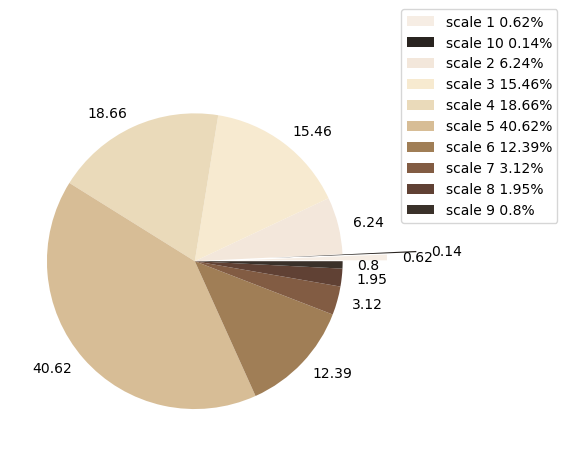

In [76]:
explode2 = [0.3,0.5,0,0,0,0,0,0,0,0]
#colours match the scale colours
colors2 = ['#f6ede4','#292420','#f3e7db','#f7ead0','#eadaba','#d7bd96', '#a07e56','#825c43','#604134','#3a312a']
plt.pie(df_monk['Count'],labels= df_monk['Percentage'] , explode=explode2, colors = colors2 )
labels = df_monk['Monk Skin Tone'] +' '+ df_monk['Percentage'].astype(str) + '%'
plt.legend(labels, loc='best', bbox_to_anchor=(0.5, 0.5, 1, 0.7))

## Stats using Fitzpatrick Skin Type Scale

In [71]:
fitz_skin_tone = list(df['fitzpatrick_skin_tone'])
type(fitz_skin_tone)

list

In [72]:
df['fitz_value']=[d['type'] for d in fitz_skin_tone]

In [73]:
#group monk skin tome scale categories to count
fitz_tone = df.groupby(by='fitz_value').count()['subject_id']
fitz_tone

fitz_value
type i       450
type ii     3918
type iii    7952
type iv     9356
type v      4309
type vi      482
Name: subject_id, dtype: int64

In [75]:
#un_fitz to find unique fitzpatrick scale categories
un_fitz = sorted(df['fitz_value'].unique())

#count_fitz to save the count as an array
count_fitz = np.array(fitz_tone)

#perc_fitz to find the percentages of each category
total_f = df['fitz_value'].count()
perc_fitz = []

for i in un_fitz:
    perc_fitz.append(round((fitz_tone[i]/total_f*100),2))

#create a data frame with the Fitzpatrick value, count and percentage
data_fitz = {'Fitzpatrick Skin Tone': un_fitz, 'Count':count_fitz, 'Percentage':perc_fitz}

df_fitz = pd.DataFrame(data_fitz)
df_fitz

,Fitzpatrick Skin Tone,Count,Percentage
0,type i,450,1.70
1,type ii,3918,14.80
2,type iii,7952,30.04
3,type iv,9356,35.35
4,type v,4309,16.28
5,type vi,482,1.82


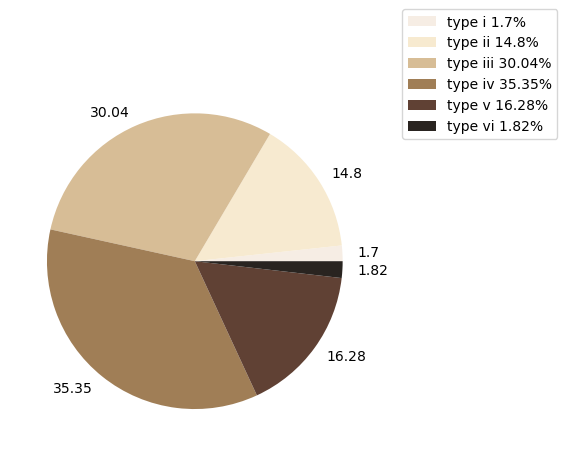

In [80]:
#colours hint at the colour scale
colors3 = ['#f6ede4','#f7ead0','#d7bd96','#a07e56','#604134','#292420']

plt.pie(df_fitz['Count'],labels= df_fitz['Percentage'] , colors = colors3 )
labels = df_fitz['Fitzpatrick Skin Tone'] +' '+ df_fitz['Percentage'].astype(str) + '%'
plt.legend(labels, loc='best', bbox_to_anchor=(0.5, 0.5, 1, 0.7))